In [6]:
import sqlalchemy as sa
import requests
import pandas as pd
import os
import matplotlib.pyplot as plt

In [69]:
url = "https://raw.githubusercontent.com/alercebroker/usecases/master/alercereaduser_v4.json"
params = requests.get(url).json()["params"]

engine = sa.create_engine(
    f"postgresql+psycopg2://{params['user']}:{params['password']}@{params['host']}/{params['dbname']}"
)
engine.begin()

oids = ["ZTF19aaxqrku", "ZTF18aavoomb", "ZTF18acwyopw" ,"ZTF21acceboj", "ZTF21aanrvaz"]
oids = [f"'{oid}'" for oid in oids]

query_detections = f"""
SELECT * FROM detection
WHERE oid in ({','.join(oids)});
"""
detections = pd.read_sql_query(query_detections, con=engine)
print(detections)
print(detections.columns)



query_forced_photometry = f"""
SELECT * FROM forced_photometry
WHERE oid in ({','.join(oids)});
"""
forced_photometry = pd.read_sql_query(query_forced_photometry, con=engine)
print(forced_photometry)
print(forced_photometry.columns)

               oid               candid           mjd  fid            pid  \
0     ZTF18aavoomb   503315013715010004  58257.315012    2   503315013715   
1     ZTF18aavoomb   503356783715015005  58257.356782    2   503356783715   
2     ZTF18aavoomb   514374363715015003  58268.374363    2   514374363715   
3     ZTF18aavoomb   524271413715010002  58278.271412    2   524271413715   
4     ZTF18aavoomb   527209783715015013  58281.209780    2   527209783715   
...            ...                  ...           ...  ...            ...   
1209  ZTF21acceboj  1796336925615015000  59550.336921    2  1796336925615   
1210  ZTF21acceboj  1796337391415015019  59550.337396    2  1796337391415   
1211  ZTF21acceboj  1870169955615015001  59624.169954    2  1870169955615   
1212  ZTF21acceboj  1873147335615015001  59627.147338    2  1873147335615   
1213  ZTF21acceboj  1882135765615015001  59636.135764    2  1882135765615   

      diffmaglim  isdiffpos   nid          ra        dec  ...  sigmagapbig 

In [70]:
detections

,oid,candid,mjd,fid,pid,diffmaglim,isdiffpos,nid,ra,dec,...,sigmagapbig,rfid,magpsf_corr,sigmapsf_corr,sigmapsf_corr_ext,corrected,dubious,parent_candid,has_stamp,step_id_corr
0,ZTF18aavoomb,503315013715010004,58257.315012,2,503315013715,20.405800,-1,503,240.645156,5.740859,...,0.0633,NaN,17.445303,100.000000,0.016360,True,False,5.272098e+17,False,bulk_1.0.0
1,ZTF18aavoomb,503356783715015005,58257.356782,2,503356783715,20.490700,1,503,240.645233,5.740790,...,0.0854,NaN,16.792156,100.000000,0.009637,True,False,5.272098e+17,False,bulk_1.0.0
2,ZTF18aavoomb,514374363715015003,58268.374363,2,514374363715,19.249200,1,514,240.645160,5.740850,...,0.1288,NaN,16.551277,0.018581,0.020983,True,False,5.432915e+17,False,bulk_1.0.0
3,ZTF18aavoomb,524271413715010002,58278.271412,2,524271413715,20.413221,-1,524,240.645135,5.740913,...,0.0774,481120237.0,17.337175,100.000000,0.015342,True,False,5.432915e+17,False,bulk_1.0.0
4,ZTF18aavoomb,527209783715015013,58281.209780,2,527209783715,20.645897,1,527,240.645155,5.740854,...,0.0297,481120237.0,16.412691,100.000000,0.007246,True,False,5.432915e+17,False,bulk_1.0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1209,ZTF21acceboj,1796336925615015000,59550.336921,2,1796336925615,20.480295,1,1796,79.087644,-13.477760,...,0.0480,305120256.0,17.222464,0.002194,0.035514,True,True,NaN,True,correction_1.0.6
1210,ZTF21acceboj,1796337391415015019,59550.337396,2,1796337391415,20.401945,1,1796,79.087643,-13.477791,...,0.0522,356120214.0,NaN,NaN,NaN,False,False,NaN,True,correction_1.0.6
1211,ZTF21acceboj,1870169955615015001,59624.169954,2,1870169955615,19.547693,1,1870,79.087639,-13.477712,...,0.3668,305120256.0,18.107824,100.000000,0.054231,True,True,NaN,True,correction_1.0.6
1212,ZTF21acceboj,1873147335615015001,59627.147338,2,1873147335615,19.500300,1,1873,79.087541,-13.477598,...,0.8670,NaN,18.134502,100.000000,0.062755,True,True,1.882136e+18,False,correction_1.0.6


In [71]:
oid = "ZTF21aanrvaz"
lc = detections[detections['oid'] == oid]
lc = lc[~lc['magpsf_corr'].isna()]

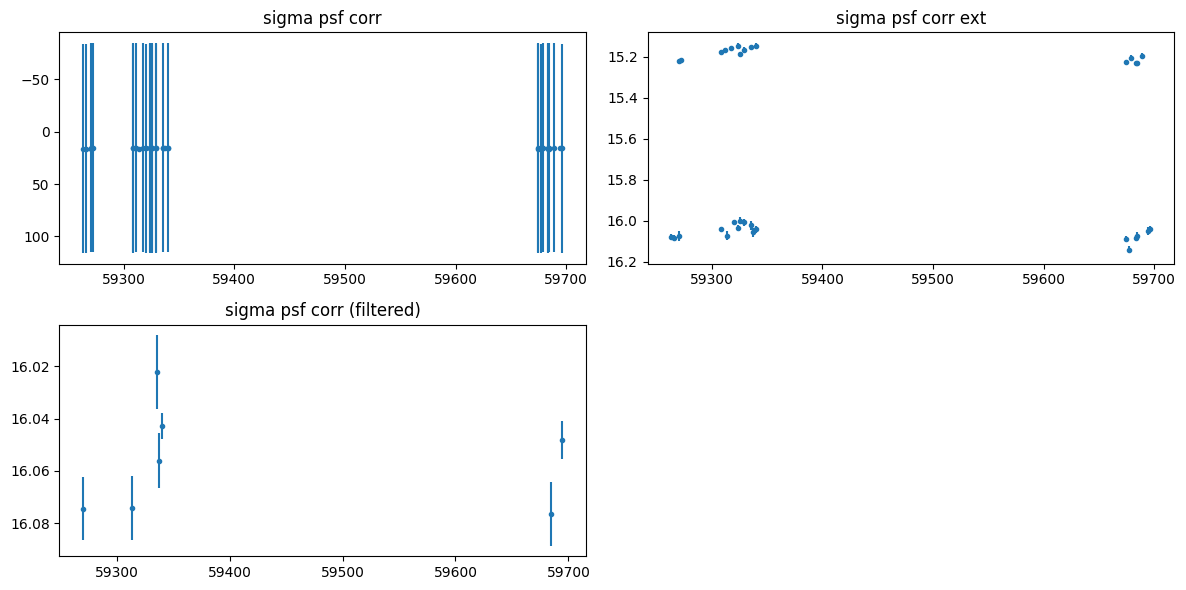

In [72]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.errorbar(
    lc.mjd,
    lc.magpsf_corr,
    yerr=lc.sigmapsf_corr,
    fmt='.'
)
plt.gca().invert_yaxis()
plt.title('sigma psf corr')

plt.subplot(2, 2, 2)
plt.errorbar(
    lc.mjd,
    lc.magpsf_corr,
    yerr=lc.sigmapsf_corr_ext,
    fmt='.'
)
plt.gca().invert_yaxis()
plt.title('sigma psf corr ext')


plt.subplot(2, 2, 3)
lc_filtered = lc[lc['sigmapsf_corr'] < 1.0]
plt.errorbar(
    lc_filtered.mjd,
    lc_filtered.magpsf_corr,
    yerr=lc_filtered.sigmapsf_corr,
    fmt='.'
)
plt.gca().invert_yaxis()
plt.title('sigma psf corr (filtered)')

plt.tight_layout()

In [38]:
print(lc.shape, lc_filtered.shape)

(22, 30) (12, 30)


## forced photometry service data

In [39]:
from config import db_credentials

In [40]:
db_credentials.keys()

dict_keys(['host', 'port', 'user', 'password', 'database'])

In [73]:
engine = sa.create_engine(
    f"postgresql+psycopg2://{db_credentials['user']}:{db_credentials['password']}@{db_credentials['host']}/{db_credentials['database']}"
)
engine.begin()

In [74]:
query_detections = f"""
SELECT * FROM processed
limit 10;
"""
detections = pd.read_sql_query(query_detections, con=engine)
detections

,oid,index,mjd,nearestrefflux,flux_tot,flux_diff_ujy,sigma_flux_diff_ujy,flux_tot_ujy,fluxunc_tot,snr_tot,...,crit4,flag_bad,forcediffimfluxunc_resc,sigma_flux_diff_ujy_resc,fluxunc_tot_resc,fluxunc_tot_ujy_resc,snr_tot_resc,sigma_mag_diff_resc,sigma_mag_tot_resc,detected
0,ZTF18acrgfuq,1034,59270.165046,1622.407727,1679.519983,6.609511,7.135338,194.368183,61.655891,27.240219,...,25.613558,0,62.548255,7.238610,62.548255,7.238610,26.851588,1.189038,0.040433,False
1,ZTF18acrgfuq,1035,59270.226169,1264.154013,1231.735076,-3.481760,10.475424,132.287043,97.537498,12.628323,...,25.623456,0,98.949187,10.627038,98.949187,10.627038,12.448158,3.313777,0.087218,False
2,ZTF18acrgfuq,1036,59272.184699,1266.601470,1265.740300,-0.092310,10.190536,135.676493,95.068581,13.313971,...,25.627688,0,96.444537,10.338026,96.444537,10.338026,13.124023,121.590186,0.082726,False
3,ZTF18acrgfuq,1037,59272.215567,1614.507274,1588.259148,-3.052518,8.465004,184.706154,72.789238,21.819972,...,25.612078,0,73.842738,8.587521,73.842738,8.587521,21.508671,3.054354,0.050477,False
4,ZTF18acrgfuq,1038,59274.165208,1248.992952,1018.488216,-25.056468,8.016812,110.712334,73.749947,13.810020,...,25.627431,0,74.817352,8.132842,74.817352,8.132842,13.612995,0.352397,0.079755,False
5,ZTF18acrgfuq,1041,59274.339734,1535.041093,1534.240298,-0.097949,12.805312,187.660723,104.691193,14.654913,...,25.540851,0,106.206420,12.990647,106.206420,12.990647,14.445834,143.992244,0.075157,False
6,ZTF18acrgfuq,1042,59276.165810,1597.055490,1510.549621,-10.170108,3.455814,177.588564,29.394791,51.388344,...,25.614454,0,29.820231,3.505831,29.820231,3.505831,50.655196,0.374262,0.021433,False
7,ZTF18acrgfuq,1043,59276.207627,1244.858496,1013.082532,-25.278331,2.868238,110.490472,26.298758,38.522068,...,25.623915,0,26.679388,2.909751,26.679388,2.909751,37.972481,0.124973,0.028592,True
8,ZTF18acrgfuq,1044,59280.161285,1601.474420,1510.392899,-10.678501,2.805276,177.080172,23.927401,63.123985,...,25.614484,0,24.273709,2.845877,24.273709,2.845877,62.223407,0.289345,0.017448,False
9,ZTF18acrgfuq,1045,59280.211944,1243.941589,1126.223706,-12.848205,2.911010,122.920598,26.671267,42.226104,...,25.620079,0,27.057288,2.953142,27.057288,2.953142,41.623673,0.249547,0.026084,False


In [75]:
oids = ["ZTF18acrgfuq", "ZTF21acceboj", "ZTF21aanrvaz"]
oids = [f"'{oid}'" for oid in oids]

query_detections = f"""
SELECT * FROM processed
WHERE oid in ({','.join(oids)});
"""
detections = pd.read_sql_query(query_detections, con=engine)
print(detections)
print(detections.columns)

               oid  index           mjd  nearestrefflux      flux_tot  \
0     ZTF21aanrvaz      0  58206.407523     9424.103604   9878.522377   
1     ZTF21aanrvaz      1  58206.448449     9505.173573  10024.240190   
2     ZTF21aanrvaz      2  58218.404826    18232.237371  19639.762119   
3     ZTF21aanrvaz      3  58218.449224    17955.601838  18928.687810   
4     ZTF21aanrvaz      4  58234.334259     6518.685849   6304.817106   
...            ...    ...           ...             ...           ...   
2090  ZTF21aanrvaz    379  60063.376736    19848.146939  28069.724480   
2091  ZTF21aanrvaz    380  60063.440127     8492.587925  11623.302088   
2092  ZTF21aanrvaz    381  60067.357014    18684.434858  26193.159916   
2093  ZTF21aanrvaz    382  60077.313599    19455.391138  27308.624501   
2094  ZTF21aanrvaz    383  60077.377130     8662.436258  11419.164854   

      flux_diff_ujy  sigma_flux_diff_ujy  flux_tot_ujy  fluxunc_tot  \
0         54.804506             8.659411   1191.3846

In [76]:
oid = "ZTF21aanrvaz"
lc = detections[detections['oid'] == oid]

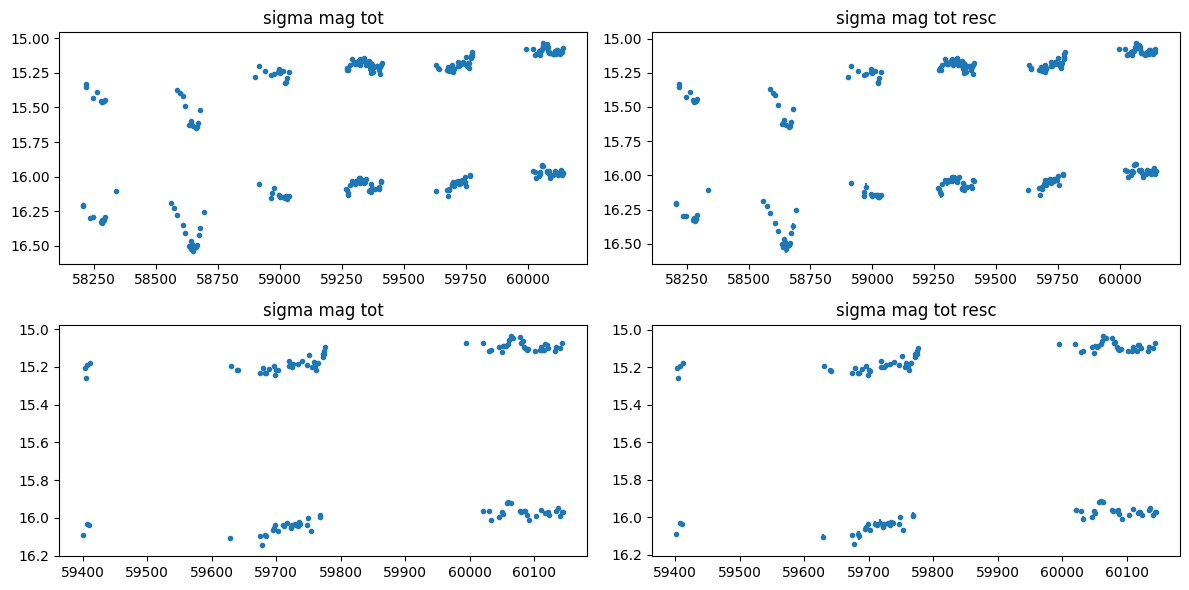

In [77]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.errorbar(
    lc.mjd,
    lc.mag_tot,
    yerr=lc.sigma_mag_tot,
    fmt='.'
)
plt.gca().invert_yaxis()
plt.title('sigma mag tot')

plt.subplot(2, 2, 2)
plt.errorbar(
    lc.mjd,
    lc.mag_tot,
    yerr=lc.sigma_mag_tot_resc,
    fmt='.'
)
plt.gca().invert_yaxis()
plt.title('sigma mag tot resc')


lc_short = lc[lc.mjd > 59400]
plt.subplot(2, 2, 3)
plt.errorbar(
    lc_short.mjd,
    lc_short.mag_tot,
    yerr=lc_short.sigma_mag_tot,
    fmt='.'
)
plt.gca().invert_yaxis()
plt.title('sigma mag tot')

plt.subplot(2, 2, 4)
plt.errorbar(
    lc_short.mjd,
    lc_short.mag_tot,
    yerr=lc_short.sigma_mag_tot_resc,
    fmt='.'
)
plt.gca().invert_yaxis()
plt.title('sigma mag tot resc')


plt.tight_layout()

In [68]:
print(lc.shape, lc_short.shape)

(634, 31) (178, 31)
